In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import os

run = 'feature_estimator'

folder = f'../data/grid/{run}'

metrics_folder = os.path.join(folder, 'metrics')
merge_file = os.path.join(folder, 'metrics.parquet')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
if not os.path.isfile(merge_file):
    dfs = [pd.read_parquet(os.path.join(metrics_folder, file)) for file in os.listdir(metrics_folder)]
    df = pd.concat(dfs)
    df.to_parquet(merge_file)
else:
    df = pd.read_parquet(merge_file)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 6
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   features      63 non-null     object 
 1   n_estimators  63 non-null     int64  
 2   cv            54 non-null     float64
 3   sample        63 non-null     object 
 4   metric        63 non-null     object 
 5   value         63 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ KB


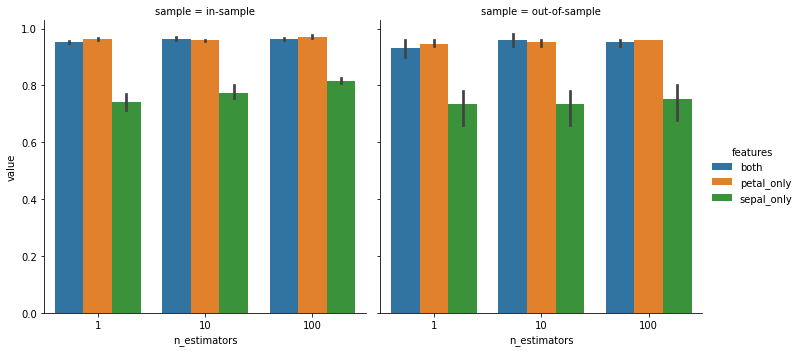

In [6]:
fg = sns.catplot(data=df, y='value', x='n_estimators', hue='features', col='sample', kind='bar')
fg.savefig(f'plots/iris_{run}_accuracy.png')
